<a href="https://colab.research.google.com/github/yzhu233/MAT421/blob/main/ModuleH_Yaci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22.1 ODE Initial Value Problem Statement

Differential equation is a relationship between a function, f(x), its independent variable, x
, and any number of its derivatives. An ordinary differential equation or ODE is a differential equation where the independent variable, and therefore also the derivatives, is in one dimension.
 
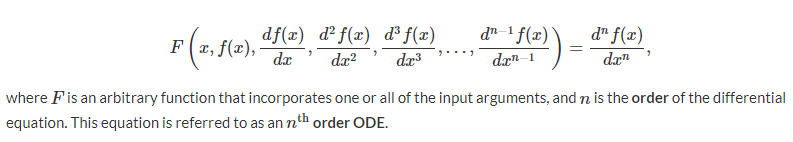

22.2 Reduction of Order

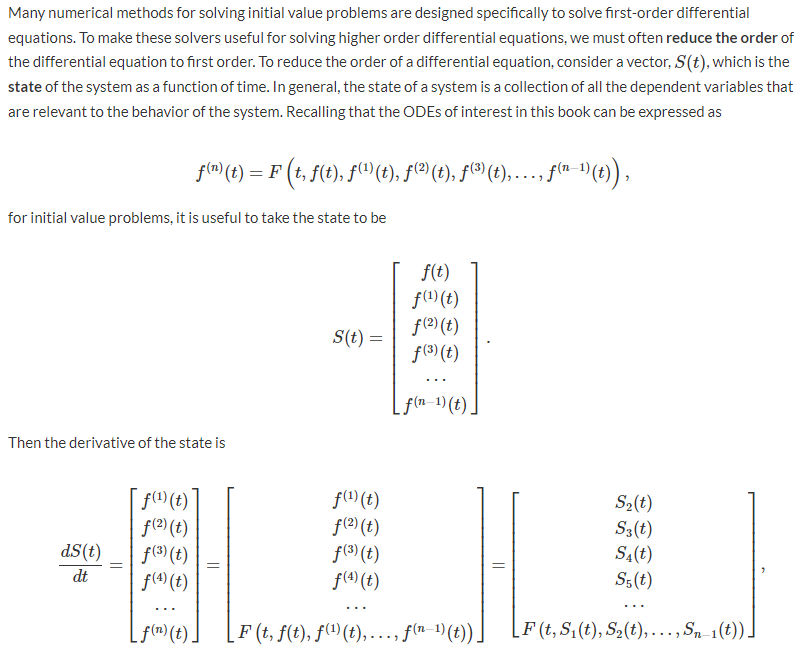

In [3]:
import numpy as np
from scipy.integrate import solve_ivp

def f(t, y):
    y1, y2 = y
    return [y2, -2*y2/t + 2*y1/t**2]

t_span = [1, 2] 
y0 = [1, 0]  
sol = solve_ivp(f, t_span, y0)

print(sol.y)


[[1.00000000e+00 1.00000025e+00 1.00002997e+00 1.00286161e+00
  1.06571860e+00 1.23474891e+00 1.41668018e+00]
 [0.00000000e+00 9.98003826e-04 1.08693494e-02 9.96413238e-02
  3.66658688e-01 5.24435431e-01 5.83328096e-01]]


22.3 The Euler Method

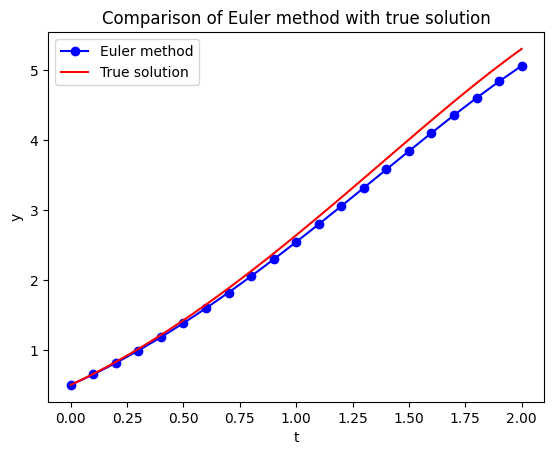

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return y - t**2 + 1

def true_solution(t):
    return (t + 1)**2 - 0.5*np.exp(t)

def euler(f, t0, y0, h, n):
    t = [t0]
    y = [y0]
    for i in range(n):
        y_next = y[-1] + h * f(t[-1], y[-1])
        y.append(y_next)
        t.append(t[-1] + h)
    return t, y

t0 = 0
y0 = 0.5
h = 0.1
n = 20
t, y = euler(f, t0, y0, h, n)
t_true = np.linspace(t0, t0 + n*h, 100)
y_true = true_solution(t_true)
plt.plot(t, y, 'bo-', label='Euler method')
plt.plot(t_true, y_true, 'r-', label='True solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparison of Euler method with true solution')
plt.legend(loc='best')
plt.show()